# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 7/11/22
* Student Name: Dominick DeCanio
* Student Net ID: dcd9ce
* This URL: https://github.com/domdecanio/montecarlo/main/Package-Writeup.ipynb
* GitHub Repo URL: https://github.com/domdecanio/montecarlo

# The Monte Carlo Module

In [1]:
import numpy as np
import pandas as pd



## Die Class ##



class Die():
    """
    A class used to represent a die whose faces are customizable, and can be rolled.
    
    Attributes
    ----------
    faces : list
        A list of the faces of the corresponding "Die" object
    weights : ndarray
        Array of weights, where the index of the "weights" array corresponds to the index of the 
        "faces" list.
    
    Methods
    ------
    __init__(n)
        Initializes the "Die" object using a list of faces "n".
    change_weights(face_value, new_weight)
        Alters the weight(s) of given face(s).
    roll(num_rolls=1)
        Rolls the "Die" object a given number of times (default once).
    show()
        Returns the private pd.Dataframe containing the faces and corresponding weights of the 
        "Die" object.
    """
    def __init__(self, n):
        """
        Purpose: This method initializes "Die" objects that can be rolled to generate a face of the die.

        Inupts: n - (list) This is a list composed of str or int values, which indicate the number of 
                           sides on the die.
        Output: ("Die" object) "Die" object which has len(n) number of sides
        """
        counter = 0
        for i in n:
            try:
                assert isinstance(i, str) == True or \
                    (isinstance(i, int) == True and isinstance(i, bool) != True)
                counter += 1
            except:
                self.init_error = "Error - Input for argument 'n' is not of type: str or int"
                print("Error - Input for argument 'n' is not of type: str or int")
        if counter == len(n):
            self.faces = n
            self.weights = np.ones_like(self.faces, dtype = np.float64)
            self.__private_df = pd.DataFrame({'face': self.faces, 'weights': self.weights})
    
    def change_weights(self, face_value, new_weight):
        """
        Purpose: This method allows the user to change the weights of the die after it has 
                 been initialized.
        
        Inputs: face_value - (str or int) The face of the die object to which you will assign a new weight.
                new_weight - (int) The new weight for this face.
        Output: (None) Weights are changed in the object's attribute.
        """
        if isinstance(face_value, list):
            for index, value in enumerate(face_value):
                if value in self.__private_df['face'].values:
                    if isinstance(new_weight[index], float) != True:
                        try:
                            new_weight[index] = float(new_weight[index])
                            self.__private_df.loc[self.__private_df['face'] == value, 'weights'] = new_weight[index]
                        except:
                            print('Error - The weight passed is invalid. It is not a float, and cannot be converted to be one.')
                    else:
                        self.__private_df.loc[self.__private_df['face'] == value, 'weights'] = new_weight[index]        
                else: 
                    print('Error - The face value passed is invalid. It is not a valid face on the die.')
        else:
            if face_value in self.__private_df['face'].values:
                if isinstance(new_weight, float) != True:
                    try:
                        new_weight = float(new_weight)
                        self.__private_df.loc[self.__private_df['face'] == face_value, 'weights'] = new_weight
                    except:
                        print('Error - The weight passed is invalid. It is not a float, and cannot be converted to be one.')
                else:
                    self.__private_df.loc[self.__private_df['face'] == face_value, 'weights'] = new_weight        
            else: 
                print('Error - The face value passed is invalid. It is not a valid face on the die.')
      
    def roll(self, num_rolls=1):
        """
        Purpose: This method allows the user to roll the die 1 or more times.
        
        Input: num_rolls - (int) Default value is 1. This argument indicates the number of times the die
                                 object will be rolled.
        Output: (list) Output is a list of values corresponding to the results of your rolls.
        """
        return (self.__private_df['face'].sample(n=num_rolls, replace=True, weights=self.__private_df['weights'])).tolist()
    
    def show(self):
        """
        Purpose: This method shows the user the df containing the faces and weights.
        
        Input: (None)
        Output: (pd.DataFrame) Output returns the dataframe containing the die's face values and weights.
        """
        return self.__private_df
    
    
    
## Game Class ##
    
    
    
class Game():
    """
    A class used to represent a game of rolling many dice. Note that all dice in a single game must have 
    the same values and number of faces. They are NOT required to have the same weights for their faces.
    
    Attributes
    ----------
    dice_faces : list
        A list of the faces of the "Die" objects therein
    dice : list
        Array of weights, where the index of the "weights" array corresponds to the index of the 
        "faces" list.
    
    Methods
    ------
    __init__(dice)
        Initializes a "Game" object using a list of "Dice" objects in the parameter "dice".
    play(num_rolls)
        Rolls the given list of dice objects a customizable number of time.
    show(df_format="wide")
        Shows the user the results of the most recently played game.
    """
    def __init__(self, dice):
        """
        Purpose: Initialize a "Game" object.
        
        Inupts: dice - (list) A list composed of "Die" objects, which indicate the number of dice 
                              to be rolled each time the game is played. 
                        NOTE: All "Die" objects included in this list must have the same value and
                              number of faces.
        Output: ("Game" object) "Game" object which is composed of len(dice) number of "Die" objects.
        """
        self.dice_faces = dice[0].faces
        self.dice = dice
        
    def play(self, num_rolls):
        """
        Purpose: Generate outcomes of a given quantity of rolls of the given dice objects.
        
        Input: num_rolls - (int) Indicates the number of times the dice will be rolled.
        Output: (None) Results are stored in a private pd.Dataframe that is an attribute of the 
                       "Game" object.
        """
        try:
            assert isinstance(num_rolls, int) == True
            self.num_rolls = num_rolls
            self.__private_play_result_df = pd.DataFrame([x.roll(num_rolls) for x in self.dice])
        except:
            print('Error - The argument entered for "num_rolls" must be an integer.')

    def show(self, df_format="wide"):
        """
        Purpose: Show the user the results of the most recently played game.
        
        Input: df_format - ("wide" or "narrow") Chooses the format in which the dataframe of results 
                                                will display.
        Output: (pd.DataFrame) The Dataframe object containing the results of the most recently played 
                               game.
        """
        if df_format == "wide":
            return self.__private_play_result_df.T
        elif df_format == "narrow":
            return self.__private_play_result_df.stack()
        else:
            print('Error - The argument entered for "df_format" is invalid')
    

    
## Analyzer Class ##



class Analyzer():
    """
    A class used to analyze a "Game" object. 
    
    Attributes
    ----------
    dice_faces : list
        List of the faces of the dice used in the "Game" object to be analyzed.
    game_df : pd.DataFrame
        Dataframe containing the results of the most recently played game of the "Game" object.
    
    Methods
    ------
    __init__(game_object)
        Initializes an "Analyzer" object using a "Game" object in the parameter "game_object".
    jackpot()
        Returns the number of rolls in which all dice faces were matching.
    combo()
        Count all unique combinations of die faces in the game, and sort them.
    face_count_per_row()
        Count occurances of each face value in each roll of the game.
    """
    def __init__(self, game_object):
        """
        Purpose: Initialize an "Analyzer" object, which allows the user to conduct analysis on a "Game"
        object after that object has been passed the .play() method at least once. The subject of 
        analysis is the "Game" object's most recent play when it was used to instatiate the "Analyzer"
        object.
        
        Input: game_object - ("Game" object) A "Game" object that has been created using a list containing 
                                             one or more "Die" object(s).
        Output: (None) Generates the attributes:  dice_faces
                                                  game_df
        """
        try:
            self.dice_faces = game_object.dice_faces
            self.game_df = game_object.show('wide')
        except AttributeError:
            self.init_error = 'Error - The argument entered for "game_object" must be of type "montecarlo.Game".'
            print('Error - The argument entered for "game_object" must be of type "montecarlo.Game".')
        
    def jackpot(self):
        """
        Purpose: Creates a dataframe indicating all rows where the values for each die were equivalent.
                 A roll (row) of the results dataframe where all the die faces are equivalent is a 
                 "jackpot". This dataframe contains the original index of the roll, as well as the 
                 values of each "Die" object.
        
        Input: (None)
        Output: (int) Number of jackpots in the "Game" object's results.
        """
        self.game_jkpt = self.game_df.loc[lambda x: self.game_df.nunique(axis=1) == 1]
        return len(self.game_jkpt)
        
    def combo(self):
        """
        Purpose: Count all unique combinations of roll results that appear in the "Game" object's results, 
                 sort them by frequency of appearance, and save this information to a dataframe.
        
        Input: (None)
        Output: (None) The results are saved to a pd.DataFrame as the class attribute "game_combo".
        """
        self.game_combo = self.game_df.apply(lambda x: pd.Series(sorted(x)), 1)\
                             .value_counts()\
                                .to_frame('n')

    def face_count_per_row(self):
        """
        Purpose: Count the occurances of each die face value within a game's roll.
        
        Input: (None)
        Output: (None) The results are saved in the pd.DataFrame class attribute "game_face_counts".
        """
        all_faces = list()
        for i in range(0,len(self.game_df)):
            events_lst = list()
            for j in self.dice_faces:
                intermediate_lst = list(self.game_df.iloc[i].apply(lambda x: x == j))
                num = sum(intermediate_lst)
                events_lst.append(num)
            all_faces.append(events_lst)
        self.game_face_counts = pd.DataFrame(all_faces, columns=self.dice_faces)

# Test Module

In [2]:
import montecarlo
import unittest


class MontecarloTestSuite(unittest.TestCase):
    
    
    def test_01_Die_init(self):
        '''
        Purpose: Testing Die.__init__() to ensure all elements of input list are valid faces (str or int).
        '''
        die = montecarlo.Die([1, True, 3, 'a', 4.3, 6])
        
        # "output" and "expected" will be equivalent if the operation was completed successfully.
        output = die.init_error
        expected = "Error - Input for argument 'n' is not of type: str or int"
        # This message will be displayed if the operation was unsuccessful.
        message = 'Error - The face value passed was invalid, but an exception was not raised.' 
        self.assertEqual(output, expected, message)
    
    
    def test_02_Die_change_weights(self):
        '''
        Purpose: Testing if the face_value passed to the .change_weights() method is valid.
        '''
        die = montecarlo.Die([1, 2, 3, 4, 5, 6])
        output = die.change_weights('a', 5)
        expected = print('The face value passed is invalid - it is not a valid face on the die.')
        
        # testValue will be "True" if the operation was completed successfully.
        testValue = output == expected
        # This message will be displayed if the operation was unsuccessful.
        message = 'Error - The face value passed was invalid, but an exception was not raised.' 
        self.assertTrue(testValue, message)


    def test_03_Die_roll(self):
        '''
        Purpose: Testing that the length of the outputted list of rolls matches the desired number of rolls.
        '''
        die = montecarlo.Die([1, 2, 3, 4, 5, 6])
        output = len(die.roll(5))
        expected = 5
        
        # testValue will be "True" if the operation was completed successfully.
        testValue = output == expected
        # This message will be displayed if the operation was unsuccessful.
        message = 'Error - The die was not rolled the desired number of times.' 
        self.assertTrue(testValue, message)

        
    def test_04_Die_show(self):
        '''
        Purpose: Ensure the Die.show() method displays the entire faces/weights dataframe.
        '''
        inputs = [1, 2, 3, 4, 5, 6]
        die = montecarlo.Die(inputs)
        output = len(die.show())
        expected = len(inputs)
        
        # testValue will be "True" if the operation was completed successfully.
        testValue = output == expected
        # This message will be displayed if the operation was unsuccessful.
        message = 'Error - The number of faces and the number of rows in the faces/weights dataframe are not equal.' 
        self.assertTrue(testValue, message)
        
        
    def test_05_Game_init(self):
        '''
        Purpose: Ensure the Game.__init__() method correctly takes a list.
        '''
        inputs = [1, 2, 3, 4, 5, 6]
        die = montecarlo.Die(inputs)
        game = montecarlo.Game([die, die])
        output = isinstance(game.dice, list)
        expected = True
        
        # testValue will be "True" if the operation was completed successfully.
        testValue = output == expected
        # This message will be displayed if the operation was unsuccessful.
        message = 'Error - The input when initializing a new instance of "Game" was not a list.' 
        self.assertTrue(testValue, message)
        
    
    def test_06_Game_play(self):
        '''
        Purpose: Ensure the Game.play() method correctly requires the input to be type "int".
        '''
        inputs = [1, 2, 3, 4, 5, 6]
        die = montecarlo.Die(inputs)
        game = montecarlo.Game([die, die])
        
        # "output" and "expected" will be equivalent if the operation was completed successfully.
        output = game.play(25.3)
        expected = print('Error - The argument entered for "num_rolls" must be an integer.')
        # This message will be displayed if the operation was unsuccessful.
        message = 'Error - The game.play() method incorrectly accepts non-integers as inputs.' 
        self.assertEqual(output, expected, message)

        
    def test_07_Game_show(self):
        '''
        Purpose: Ensure the Game.show() method correctly handles improper inputs.
        '''
        inputs = [1, 2, 3, 4, 5, 6]
        die = montecarlo.Die(inputs)
        game = montecarlo.Game([die, die])
                
        # "output" and "expected" will be equivalent if the operation was completed successfully.
        output = game.show('blob')
        expected = print('Error - The argument entered for "df_format" is invalid')
        # This message will be displayed if the operation was unsuccessful.
        message = 'Error - The input when initializing a new instance of "Game" was not a list.' 
        self.assertEqual(output, expected, message)
    
    
    def test_08_Analyzer_init(self):
        '''
        Purpose: Ensure the Analyzer.__init__() method  correctly prohibits inputs other than "Game"
                 objects from the montecarlo package when instantiating a new "Analyzer" object.
        '''
        broken_analyzer = montecarlo.Analyzer('blob')
        
        # "output" and "expected" will be equivalent if the operation was completed successfully.
        output = broken_analyzer.init_error
        expected = 'Error - The argument entered for "game_object" must be of type "montecarlo.Game".'
        # This message will be displayed if the operation was unsuccessful.
        message = 'Error - The argument entered for "game_object" was not of type "montecarlo.Game".' 
        self.assertEqual(output, expected, message)
        
        
    def test_09_Analyzer_jackpot(self):
        '''
        Purpose: Ensure the Analyzer.jackpot() method does not incorrectly classify jackpots.
        '''
        inputs = [1, 2, 3, 4, 5, 6]
        die1 = montecarlo.Die(inputs)
        die2 = montecarlo.Die(inputs)
        die1.change_weights(1, 1000)
        die1.change_weights(6, .001)
        die2.change_weights(6, 1000)
        die2.change_weights(1, .001)
        game = montecarlo.Game([die1, die2])
        game.play(100)
        analyzer = montecarlo.Analyzer(game)
        
        # "output" and "expected" will be equivalent if the operation was completed successfully.
        output = analyzer.jackpot()
        expected = 0
        # This message will be displayed if the operation was unsuccessful.
        message = 'Error - The Analyzer.jackpot() incorrectly identifies jackpots.' 
        self.assertEqual(output, expected, message)
        
        
    def test_10_Analyzer_combo(self):
        '''
        Purpose: Ensure the Analyzer.combo() method correctly sorts the face combinations.
        '''
        inputs = [1, 2, 3, 4, 5, 6]
        die = montecarlo.Die(inputs)
        game = montecarlo.Game([die, die])
        game.play(25)
        analyzer = montecarlo.Analyzer(game)
        analyzer.combo()
        output1 = list(analyzer.game_combo['n'])[0]
        output2 = list(analyzer.game_combo['n'])[1]
        
        # Will be "True" if the operation was completed successfully.
        testValue = output1 >= output2
        # This message will be displayed if the operation was unsuccessful.
        message = 'Error - The Analyzer.combo() method incorrectly sorts the face combinations.' 
        self.assertTrue(testValue, message)
    

    def test_11_Analyzer_face(self):
        '''
        Purpose: Ensure the Analyzer.face_count_per_row() method includes a row for each die face.
        '''
        inputs = [1, 2, 3, 4, 5, 6]
        die = montecarlo.Die(inputs)
        game = montecarlo.Game([die, die])
        game.play(25)
        analyzer = montecarlo.Analyzer(game)
        analyzer.face_count_per_row()
                
        # "output" and "expected" will be equivalent if the operation was completed successfully.
        output = analyzer.game_face_counts.shape[1]
        expected = len(inputs)
        # This message will be displayed if the operation was unsuccessful.
        message = 'Error - The Analyzer.face_count_per_row() method does not include a row for each die face.' 
        self.assertEqual(output, expected, message)
        
        
if __name__ == '__main__':
    
    unittest.main(verbosity=2)

C:\Users\Dom\AppData\Roaming\jupyter\runtime\kernel-0ef1d1c8-9d5b-47a6-a2bc-3d0b2395b6e5 (unittest.loader._FailedTest) ... ERROR

ERROR: C:\Users\Dom\AppData\Roaming\jupyter\runtime\kernel-0ef1d1c8-9d5b-47a6-a2bc-3d0b2395b6e5 (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\Dom\AppData\Roaming\jupyter\runtime\kernel-0ef1d1c8-9d5b-47a6-a2bc-3d0b2395b6e5'

----------------------------------------------------------------------
Ran 1 test in 0.004s

FAILED (errors=1)


SystemExit: True

C:\Users\Dom\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Test Results

test_01_Die_init (__main__.MontecarloTestSuite)
Purpose: Testing Die.__init__() to ensure all elements of input list are valid faces (str or int). ... ok
test_02_Die_change_weights (__main__.MontecarloTestSuite)
Purpose: Testing if the face_value passed to the .change_weights() method is valid. ... 
  if face_value in self.__private_df['face'].values:
ok
test_03_Die_roll (__main__.MontecarloTestSuite)
Purpose: Testing that the length of the outputted list of rolls matches the desired number of rolls. ... ok
test_04_Die_show (__main__.MontecarloTestSuite)
Purpose: Ensure the Die.show() method displays the entire faces/weights dataframe. ... ok
test_05_Game_init (__main__.MontecarloTestSuite)
Purpose: Ensure the Game.__init__() method correctly takes a list. ... ok
test_06_Game_play (__main__.MontecarloTestSuite)
Purpose: Ensure the Game.play() method correctly requires the input to be type "int". ... ok
test_07_Game_show (__main__.MontecarloTestSuite)
Purpose: Ensure the Game.show() method correctly handles improper inputs. ... ok
test_08_Analyzer_init (__main__.MontecarloTestSuite)
Purpose: Ensure the Analyzer.__init__() method  correctly prohibits inputs other than "Game" ... ok
test_09_Analyzer_jackpot (__main__.MontecarloTestSuite)
Purpose: Ensure the Analyzer.jackpot() method does not incorrectly classify jackpots. ... ok
test_10_Analyzer_combo (__main__.MontecarloTestSuite)
Purpose: Ensure the Analyzer.combo() method correctly sorts the face combinations. ... ok
test_11_Analyzer_face (__main__.MontecarloTestSuite)
Purpose: Ensure the Analyzer.face_count_per_row() method includes a row for each die face. ... ok

----------------------------------------------------------------------
Ran 11 tests in 0.100s

OK

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1: 2-Sided Coin

1. Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.

In [2]:
faces = ['H', 'T']
fair_coin = montecarlo.Die(faces)

unfair_coin = montecarlo.Die(faces)

unfair_coin.change_weights('H', 5)
unfair_coin.show()

,face,weights
0,H,5.0
1,T,1.0


2. Play a game of 1000 flips of three coins with all fair dice.

In [3]:
all_fair = [fair_coin, fair_coin, fair_coin]
game1 = montecarlo.Game(all_fair)
game1.play(1000)

3. Play a game of 1000 flips with two unfair dice and one fair die.

In [4]:
one_fair = [unfair_coin, unfair_coin, fair_coin]
game2 = montecarlo.Game(one_fair)
game2.play(1000)

4. For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.

In [5]:
game1_analize = montecarlo.Analyzer(game1)
game2_analize = montecarlo.Analyzer(game2)

In [6]:
print(f"""Relative frequency of a jackpot:
Number of jackpots in "game1": {game1_analize.jackpot()}
Number of jackpots in "game2": {game2_analize.jackpot()}
""")

Relative frequency of a jackpot:
Number of jackpots in "game1": 250
Number of jackpots in "game2": 370



5. Compute relative frequency as the number of jackpots over the total number of rolls.

In [7]:
print(f"""Relative frequency of a jackpot:
Number of jackpots in "game1" / total rolls: {game1_analize.jackpot()/len(game1.show("wide"))}
Number of jackpots in "game2" / total rolls: {game2_analize.jackpot()/len(game2.show("wide"))}
""")

Relative frequency of a jackpot:
Number of jackpots in "game1" / total rolls: 0.25
Number of jackpots in "game2" / total rolls: 0.37



6. Show your results, comparing the two relative frequencies, in a simple bar chart.

<BarContainer object of 2 artists>

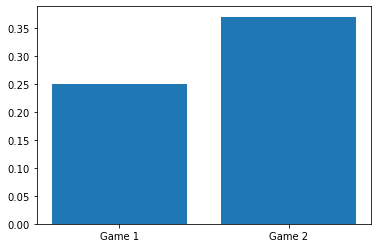

In [8]:
freq_lst = [game1_analize.jackpot()/len(game1.show("wide")), game2_analize.jackpot()/len(game2.show("wide"))]
labels = ['Game 1', 'Game 2']
plt.bar(labels, freq_lst)


## Scenario 2: 6-Sided Die

1. Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.

In [9]:
faces = [1, 2, 3, 4, 5, 6]
fair_die = montecarlo.Die(faces)

unfair_die_t1 = montecarlo.Die(faces)
unfair_die_t1.change_weights(6, 5)

unfair_die_t2 = montecarlo.Die(faces)
unfair_die_t2.change_weights(1, 5)

2. Play a game of 10000 rolls with 5 fair dice.

In [10]:
all_fair_dice = [fair_die, fair_die, fair_die, fair_die, fair_die]
game3 = montecarlo.Game(all_fair_dice)
game3.play(10000)

3. Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.

In [11]:
two_fair_dice = [unfair_die_t1, unfair_die_t1, unfair_die_t2, fair_die, fair_die]
game4 = montecarlo.Game(all_fair_dice)
game4.play(10000)

4. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

In [12]:
game3_analize = montecarlo.Analyzer(game3)
game4_analize = montecarlo.Analyzer(game4)

<BarContainer object of 2 artists>

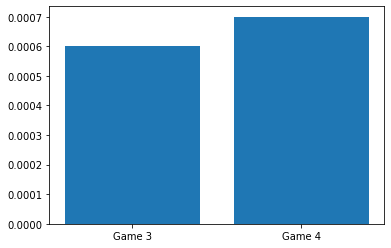

In [13]:
freq_lst_2 = [game3_analize.jackpot()/len(game3.show("wide")), game4_analize.jackpot()/len(game4.show("wide"))]
labels_2 = ['Game 3', 'Game 4']
plt.bar(labels_2, freq_lst_2)

5. Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

<AxesSubplot:xlabel='0,1,2,3,4'>

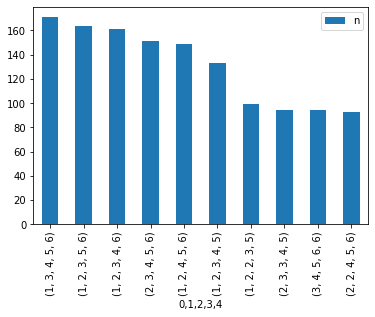

In [19]:
game3_analize.combo()
game3_top_10 = game3_analize.game_combo.head(10)
game3_top_10.plot.bar()

<AxesSubplot:xlabel='0,1,2,3,4'>

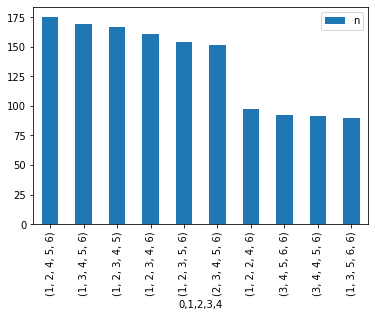

In [20]:
game4_analize.combo()
game4_top_10 = game4_analize.game_combo.head(10)
game4_top_10.plot.bar()

## Scenario 3: Letters of The Roman Alphabet

1. Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.

In [16]:
letters= ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
weights = [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034, 7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544, 7.1635, 3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902, 1.7779, 0.2722]
letters_die = montecarlo.Die(letters)

letters_die.change_weights(letters, weights)

2. Play a game involving 5 of these dice with 1000 rolls.

In [22]:
letter_dice = [letters_die, letters_die, letters_die, letters_die, letters_die]
game5 = montecarlo.Game(letter_dice)
game5.play(1000)

3. How many combos can you that look like actual English words?
        a. NOTE: "combo" here should really be permutation, which make sense for words. So just compute these from the result data you get from the Game object.

In [27]:
game5.show().sample(20)

,0,1,2,3,4
806,a,s,e,p,e
289,t,t,o,s,t
231,y,n,d,f,h
285,c,e,c,e,c
782,p,e,g,e,e
842,a,e,a,t,r
951,d,i,i,i,c
777,i,a,d,r,l
77,a,h,e,c,d
163,e,n,q,t,v


Many permutations looks similar to english words, though none of the 80 combinations sampled actually were english words. The permutation to an english word was "tiper".

4. Based on your eye count, what is the relative frequency of these words versus the rest?
        a. NOTE: You can do a few random sample to compute your estimate.

Based on my random samples, the relative frequency is 0/80, or 0.00 of the words in the sample are actual english words, if the sample is representative of the population.

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [4]:
# I am using the command !dir here because I am running this code on a windows machine.
!dir

 Volume in drive C has no label.
 Volume Serial Number is B0D0-44C8

 Directory of C:\Users\Dom\Desktop\edu\MSDS\summer_22\DS_5100\final_project

07/16/2022  02:16 AM    <DIR>          .
07/16/2022  02:16 AM    <DIR>          ..
07/16/2022  02:04 AM    <DIR>          .ipynb_checkpoints
07/16/2022  02:16 AM            84,428 Final_Project_Dominick_DeCanio.ipynb
07/16/2022  01:51 AM            17,041 final_project_scrap.ipynb
07/14/2022  11:11 AM            18,943 final_testy.ipynb
07/16/2022  12:47 AM            11,425 montecarlo.py
07/16/2022  02:15 AM            53,274 montecarlo_demo.ipynb
07/16/2022  12:47 AM            16,232 montecarlo_testing_for_unittests.ipynb
07/16/2022  12:47 AM             8,320 montecarlo_tests.py
07/16/2022  01:33 AM             3,540 montecarlo_test_results.txt
07/16/2022  02:03 AM               423 setup.py
07/16/2022  01:25 AM    <DIR>          __pycache__
               9 File(s)        213,626 bytes
               4 Dir(s)  328,400,596,992 bytes free


# Installation Output Listing
    
A code block that executes the code to install your package and outputs a successful installation.

In [1]:
pip install .

Processing c:\users\dom\desktop\edu\msds\summer_22\ds_5100\montecarlo
  Created wheel for montecarlo: filename=montecarlo-1.0.0-py3-none-any.whl size=5381 sha256=05277553836d807674877629e2ef15c27b97a5d8fd0de5cffb1375f101901174
  Stored in directory: C:\Users\Dom\AppData\Local\Temp\pip-ephem-wheel-cache-givq76ig\wheels\c5\fe\9c\73ec50028e6e9e68ff736594e8a51468f9e85e87f7482c50f2
Successfully built montecarlo
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
